In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
#convert it into arrays for our machine to process it
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

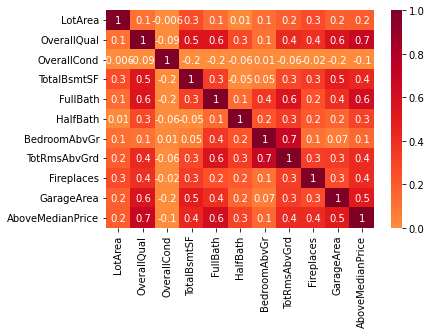

In [ ]:
# Plotting Heatmap to disply the correlation between variables
sns.heatmap(df.corr(),annot=True,fmt='.1g',vmin=0, vmax=1, center= 0,cmap='YlOrRd')

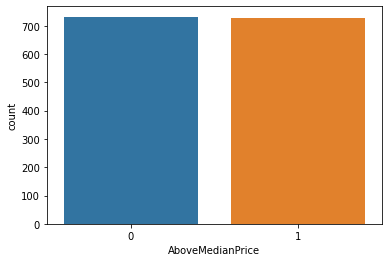

In [ ]:
# Count Plot
sns.countplot(x="AboveMedianPrice",data=df)

In [ ]:
# train and test dataset into 70:30 ratio by defining test_size=0.3
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
#Record count after split
print("XTrain",Xtrain.shape)
print("XTest",Xtest.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)

XTrain (1022, 10)
XTest (438, 10)
ytrain (1022,)
ytest (438,)


In [ ]:
'''# data after standarization converted into range -3 to +3
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()
Xtrain[:,:]=Sc.fit_transform(Xtrain[:,:]) # standardizing on train dataset
Xtest[:,:]=Sc.transform(Xtest[:,:])# fit the same sc object on test dataset'''

'# data after standarization converted into range -3 to +3\nfrom sklearn.preprocessing import StandardScaler\nSc= StandardScaler()\nXtrain[:,:]=Sc.fit_transform(Xtrain[:,:]) # standardizing on train dataset\nXtest[:,:]=Sc.transform(Xtest[:,:])# fit the same sc object on test dataset'

In [ ]:
'''#Label Encoder is used to Encode the categorical value Y(0,1,2).
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
Y_train=labelencoder_y.fit_transform(ytrain)
Y_test=labelencoder_y.fit_transform(ytest)'''

'#Label Encoder is used to Encode the categorical value Y(0,1,2).\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder_y=LabelEncoder()\nY_train=labelencoder_y.fit_transform(ytrain)\nY_test=labelencoder_y.fit_transform(ytest)'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors =5, metric="minkowski",p=2)
#p, default=2 euclidean_distance,p = 1,using manhattan_distance
classifier.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting Results
ypred=classifier.predict(Xtest) # Predicting Data Values
ypred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
cm=confusion_matrix(ytest,ypred)
cm

array([[169,  49],
       [ 44, 176]])

In [ ]:
#Accuracy Score
score=accuracy_score(ytest,ypred)
print('Accuracy Score',round(score*100,ndigits=2))

Accuracy Score 78.77
